In [14]:
#import libs

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
#load dataset
data = sb.load_dataset("iris")
data.columns

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


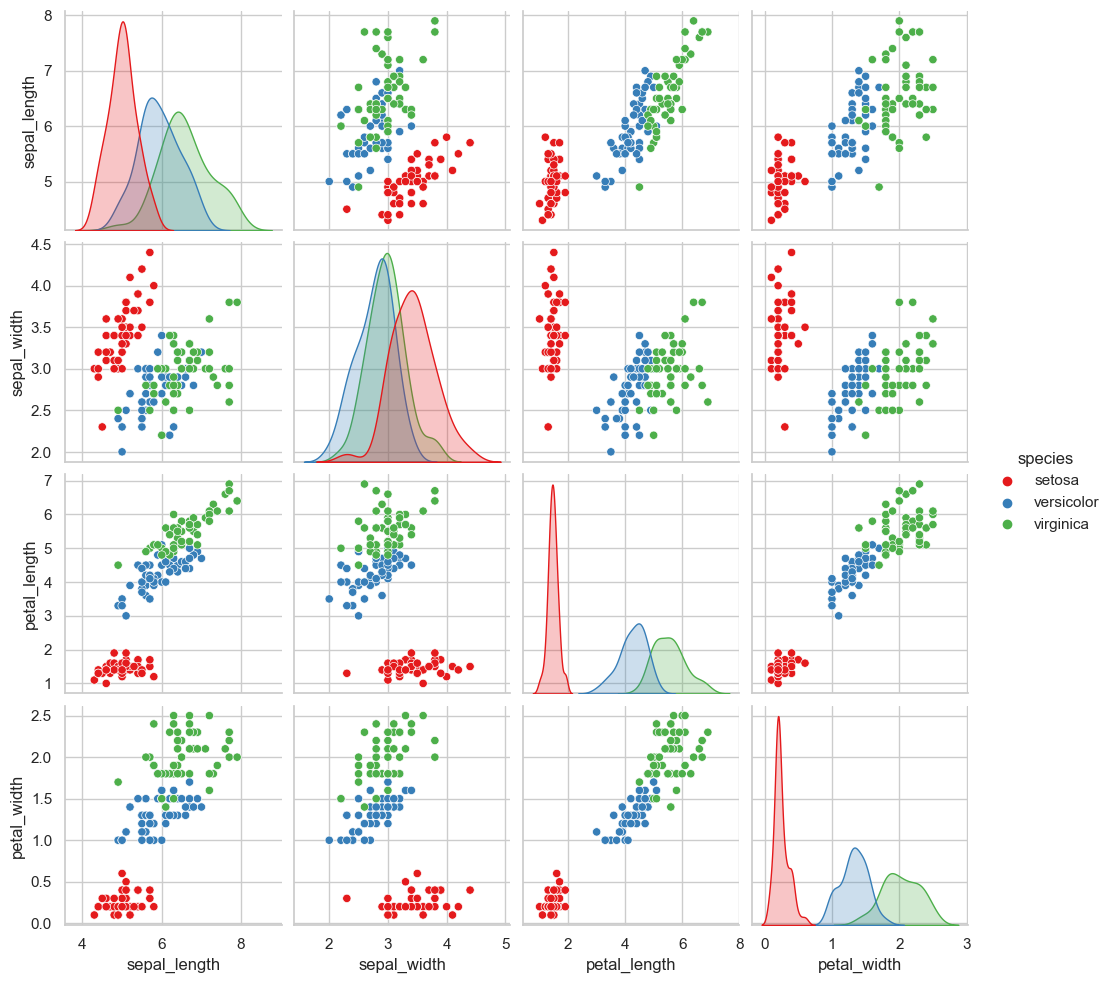

In [16]:
#Q1

sb.set_theme(style="whitegrid")

sb.pairplot(data, hue="species", palette="Set1")

In [17]:
#Delete columns
del data['species']
del data['sepal_length']
del data['sepal_width']

data

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [18]:
#Q2

X = data.drop(labels='petal_length', axis = 1)
Y = data['petal_length']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, shuffle = True)


In [19]:
#Q3

lr = LinearRegression()
lr.fit(X_train, Y_train)

pred = lr.predict(X_test)
pred

array([3.29254411, 1.54737545, 1.98366761, 5.69215102, 3.94698236,
       5.25585885, 5.25585885, 3.51069019, 3.94698236, 3.72883627,
       5.25585885, 3.29254411, 4.16512844, 4.60142061, 1.54737545,
       1.54737545, 1.54737545, 4.38327452, 4.16512844, 6.12844318,
       5.47400494, 1.76552153, 3.94698236, 3.72883627, 1.32922936,
       1.54737545, 4.16512844, 6.12844318, 3.94698236, 4.16512844,
       1.54737545, 6.56473535, 3.94698236, 1.76552153, 4.60142061,
       1.54737545, 1.98366761, 6.12844318, 6.12844318, 4.38327452,
       1.98366761, 4.16512844, 5.03771277, 1.54737545, 1.98366761])

In [20]:
#Q4

print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))


Mean Absolute Error: 0.34554001482971225
Mean Squared Error: 0.19246299372359676


In [21]:
#Q5

rand = random.randint(0,Y_test.size - 1)

print(X_test.iloc[rand])

print('Predicted Petal Length (cm):', pred[rand])
print('Actual Petal Length (cm):', Y_test.iloc[rand])
print('Difference:', (pred[rand] - Y_test.iloc[rand]))

print('Mean Squared Error:', (Y_test.iloc[rand] - pred[rand])**2)

petal_width    1.9
Name: 130, dtype: float64
Predicted Petal Length (cm): 5.255858853642929
Actual Petal Length (cm): 6.1
Difference: -0.8441411463570709
Mean Squared Error: 0.7125742749730298


In [22]:
#Q6

x = data['petal_length']
y = data['petal_width']

fit = np.polyfit(x,y,1)
ang = fit[0]
intercept = fit[1]
fit_eq = ang*x + intercept  #obtaining the y axis values for the fitting function

print(ang,"x + ", intercept, " = 0")


0.41575541635241153 x +  -0.36307552131902887  = 0


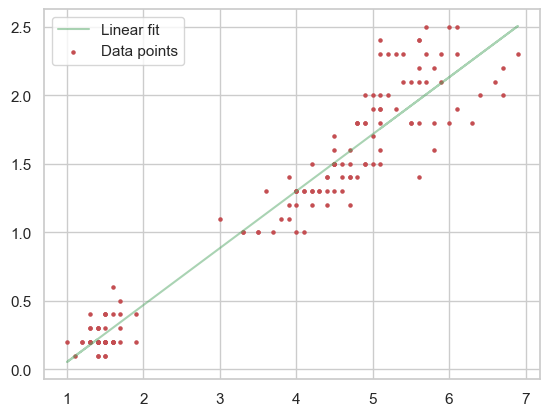

In [23]:
#Q7

fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'g', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'r', label = 'Data points')
ax.legend()

In [24]:
#Q8

rsquared_linear = r2_score(y, fit_eq)
rsquared_linear

0.9271098389904927

In [25]:
#Q9

y = data['petal_length']
x = data['petal_width']

fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c

print(a, "x^2 + ",b, "x + ",c, "= 0")


-0.5276918247930916 x^2 +  3.4548335349455273 x +  0.6780834430199655 = 0


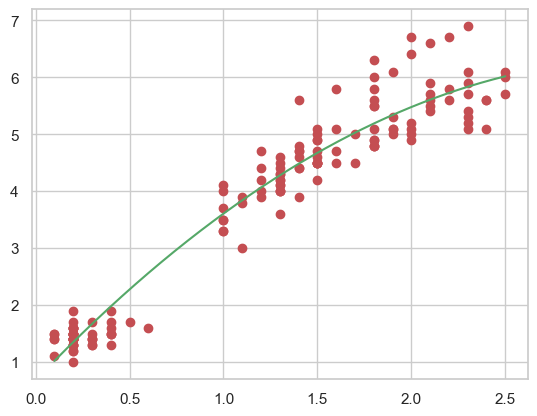

In [26]:
#Q10

plt.plot(x, y, 'o', color = 'r')

ax1 = np.linspace(min(x),max(x), 1000)
ax2 = np.polyval(fit,ax1)

plt.plot(ax1,ax2, color = 'g')